# TensorFlow Demo: MNIST for ML Beginners
Before start using this, please select `Cell` - `All Output` - `Clear` to clear the old results. See [TensorFlow Tutorial](https://www.tensorflow.org/versions/master/tutorials/mnist/beginners/index.html) for details of the tutorial.

# Loading MNIST training data

In [194]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Training Images
![mnist.train.xs](https://www.tensorflow.org/versions/master/images/mnist-train-xs.png)

In [195]:
# check MNIST training images matrix shape
mnist.train.images.shape

(55000, 784)

In [199]:
# show MNIST label data
sample_label = mnist.train.labels[5]
sample_label

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

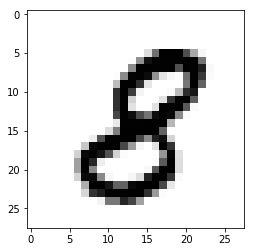

In [187]:
# plot the image
plt.imshow(sample_img).set_cmap('Greys')

## Training Labels
![mnist.train.ys](https://www.tensorflow.org/versions/master/images/mnist-train-ys.png)

In [188]:
# check MNIST labels shape
mnist.train.labels.shape

(55000, 10)

In [189]:
# show MNIST label data
sample_label = mnist.train.labels[5]
sample_label

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

# Defining a Neural Network

## in a graph:
![](https://www.tensorflow.org/versions/master/images/softmax-regression-scalargraph.png)

## in a vector equation:
![](https://www.tensorflow.org/versions/master/images/softmax-regression-vectorequation.png)

## so that we'll have the weights like this:
blue: positive weights, red: negative weights
![](https://www.tensorflow.org/versions/master/images/softmax-weights.png)

In [200]:
# define a neural network (softmax logistic regression)
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b) # the equation
y

<tf.Tensor 'Softmax_37:0' shape=(?, 10) dtype=float32>

# Defining the Train Step

In [207]:
# define the train step to minimize the cross entropy with SGD
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(cross_entropy)
train_step

<tf.Operation 'GradientDescent_40' type=NoOp>

## Use Gradient Decent to find the optimal weights
![](http://blog.datumbox.com/wp-content/uploads/2013/10/gradient-descent.png)
From: [Machine Learning Blog & Software Development News](http://blog.datumbox.com/tuning-the-learning-rate-in-gradient-descent/)

# Do 1000 times of mini-batch training

In [208]:
# initialize variables and session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# train the model mini batch with 100 elements, for 1K times
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Test

In [209]:
# evaluate the accuracy of the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.8719


# TODO

* Ajouter une cellule ou vous lancerez une initialisation, afficherez la valeur des poids avant et après une optimisation. Est-ce que les poids change effectivement avant et après l'optimisation ? 


* Modifier ce notebook pour afficher deux courbes montrant la progression du loss/accuracy sur le training/test une fois le training terminé. Vous pouvez pour cela utiliser matplotlib.pyplot


* quelle courbe semble dominer et obtenir les meilleurs résultats?


* Affichez les logs de l'évolution du training et du test pendant le training.


* Pouvez vous imaginez une formule d'erreur différente ? Mettez-la en place et comparer les résultats.


* Modifiez le learning rate de 0001 à 0.1. Quelle sont les conséquences ? Pourquoi ?


* Ajouter un seed à python et un seed à tensorflow. Pouvez-vous en déduire l'importance du seed dans un entrainement ?


* A présent, trouvez le learning rate le plus favorable


* Essayez de rajouter un hidden layer constitué de 16 neurones. La structure passera ainsi de 764 -> 10 à 764 -> 16 -> 10. Le layer intermédiaire devra être constitué de poids et d'un bias. Initialiser les poids à zero est-il une bonne idée avec deux layers ? Pourquoi ? Arrivez-vous à atteindre les mêmes performances avec un layer additionnel ? Que pouvez-vous en déduire ? 


* Il existe d'autre algorithms basé sur la déscente de gradient utile pour optimiser vos variables, essayer de remplacer la version actuel par une version plus sophisticé. Documentez vous sur les différences exacts